<a href="https://colab.research.google.com/github/DesmondTim/DesmondTim/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data= r'/content/Titanic-Dataset.csv'
df=pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

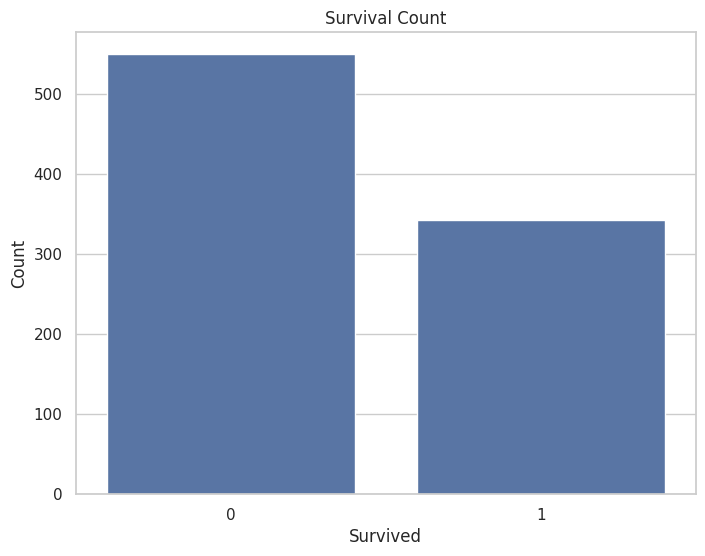

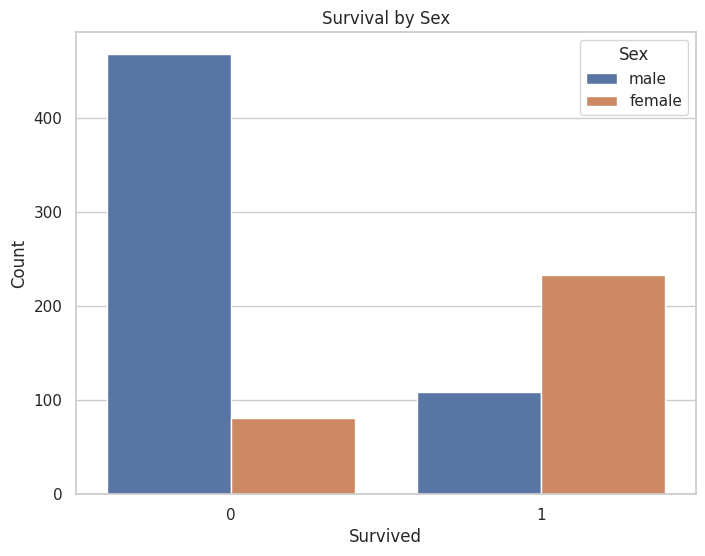

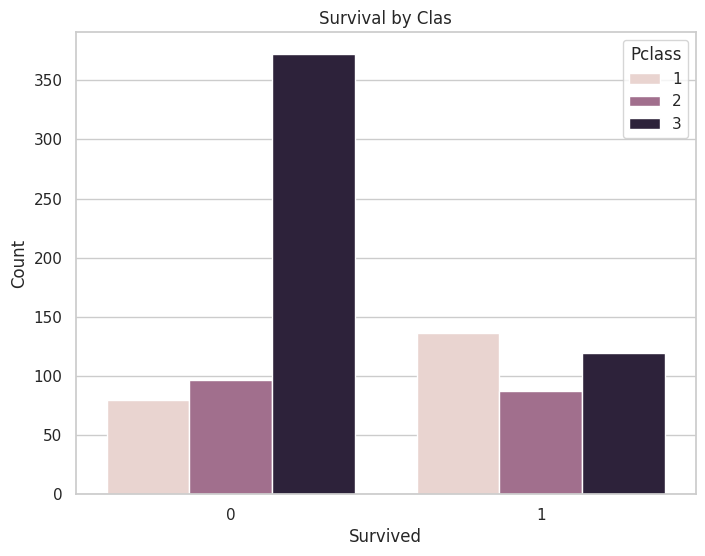

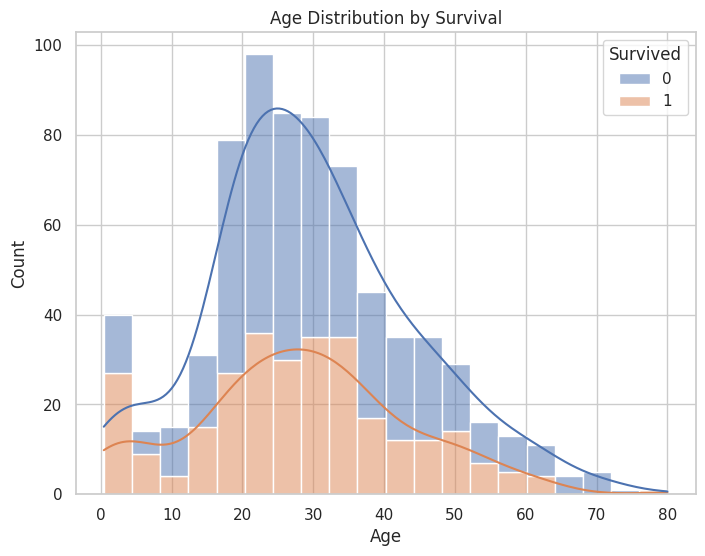

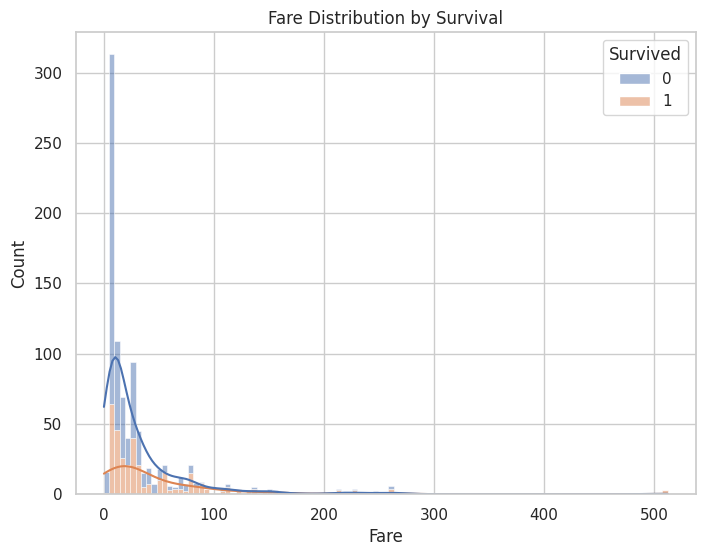

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set style
sns.set(style='whitegrid')

#plot 1:survival count
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#plot 2: survival by sex
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',hue='Sex', data=df)
plt.title('Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#plot 3: survival by pclass
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Clas')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#plot 4: Age distribution byu survival
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True )
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#plot 5: Fare distribution by survival
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=True )
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()



<Axes: >

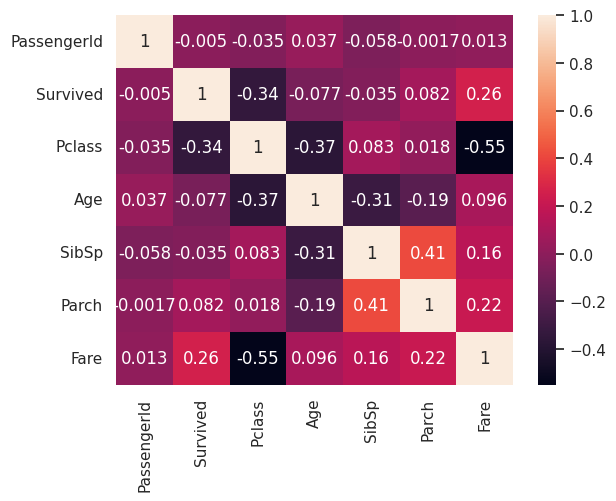

In [ ]:
import pandas as pd

data = r'/content/Titanic-Dataset.csv'
df = pd.read_csv(data)

# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation on the numerical DataFrame
correlation = numerical_df.corr()
correlation

import seaborn as sns
sns.heatmap(correlation, annot=True)

In [ ]:
import seaborn as sns
#plot the histogram
plt.figure(fisize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True , color='skyblue')
plt.title('Age Distribution of Titanic Passengers',fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

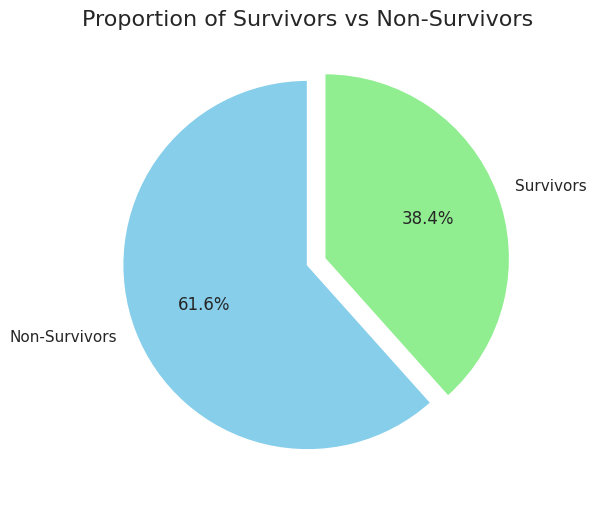

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#count surviviors and non survivors
survival_counts= df['Survived'].value_counts()
#labeland colors for the pie chart
labels= ['Non-Survivors', 'Survivors']
colors= ['skyblue', 'lightgreen']
#create a pie chart
plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0,0.1))
plt.title('Proportion of Survivors vs Non-Survivors', fontsize=16)
#plt.axis('equal')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np


#handle missing values
imputer= SimpleImputer(strategy='mean')
df['Age']= imputer.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#df['Fare']= imputer.fit_transform(df[['Fare']])

#Drop the 'cabin' column
df.drop(columns=['Cabin'], inplace=True)

#encode categorical variables
label_encoder= LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

#define features and target variable
x= df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])#features
y= df['Survived']#our target

#split the data into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

#scale the features
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

print('Data Processing Completed')

Data Processing Completed


<ipython-input-4-1efdc18d77d5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
#Assignment
#underfitting and overfitting, and over-sampling
#k-nearest model

In [ ]:
#n_estimator has various range base on the classification. If we make use of 100
#that means we'll be having 100 decision tree.
#if n_estimator is lesser than 10, it will result in underfitting and if it is >500, it will result in overfitting.

#random.state: to avoid bias

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#build the model
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

#make predictions on the test set
y_pred= model.predict(x_test)

#evaluate the model
accuracy= accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
class_report= classification_report(y_test, y_pred)

print('Model Accuracy:\n', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Model Accuracy:
 0.8100558659217877
Confusion Matrix:
 [[98 12]
 [22 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

#encode categorical value
label_encoder= LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

#handling missing values
imputer= SimpleImputer(strategy='mean')
df['Age']= imputer.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#drop the'Cabin' Column
df.drop(columns=['Cabin'], inplace=True)
x= df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y= df['Survived']

x=train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)
model= DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

#predict on the rest set
y_pred= model.predict(x_test)

#build the model
#model= DecisionTreeClassifier(random_state=42)
#model.fit(x_train, y_train)

accuracy= accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
class_report= classification_report(y_test, y_pred)

print('Model Accuracy:\n', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Model Accuracy:
 0.6145251396648045
Confusion Matrix:
 [[110   0]
 [ 69   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



<ipython-input-8-14822f31d831>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi